# Exercise 4

Group Members:
1. Ethan McChristian
2. Haithem Merchaoui
3. Mitchell Tyse

## Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data
df_close = pd.read_csv('data/closing_prices.csv')

# convert to datetime
df_close['Date'] = pd.to_datetime(df_close['Date'])

In [3]:
plt.style.use('ggplot')

In [5]:
def plot_close(df):

    ### Create plot ###
    fig, ax = plt.subplots(figsize = (10,10))
        
    for i in df['Stock'].unique():
        
        # extract subset
        df_subset = df[df['Stock'] == i].copy()
    
        ax.plot(df_subset['Date'],
                df_subset['Close'],
                label = i,
                alpha = .8)

    # add axis label and legend
    ax.set_ylabel('Closing price ($)', fontsize = 22)
    ax.legend()
    
    plt.show()

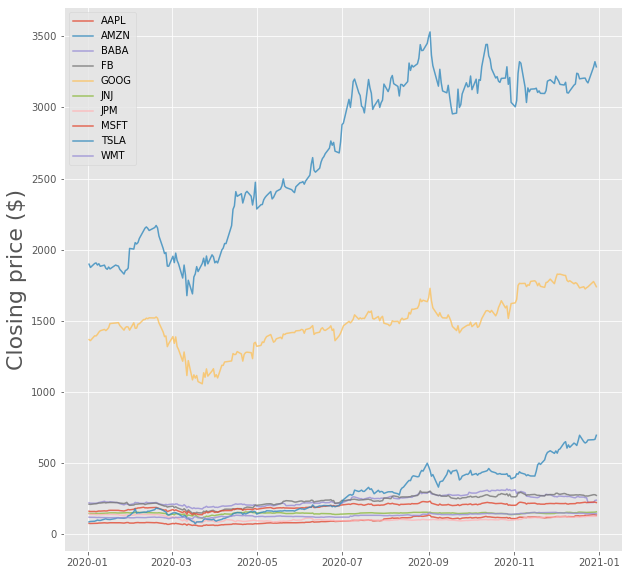

In [6]:
plot_close(df_close)

# Exercise 4 Part 2

In [53]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')

In [5]:
mpg_df = pd.read_excel('data/mpg.xlsx')

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


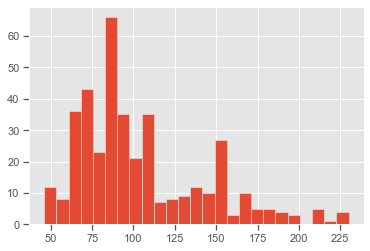

In [6]:
figure, ax = plt.subplots()

ax.hist(mpg_df['horsepower'],
       bins = 25)

plt.show()

C:\Users\skaterboy1998\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skaterboy1998\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


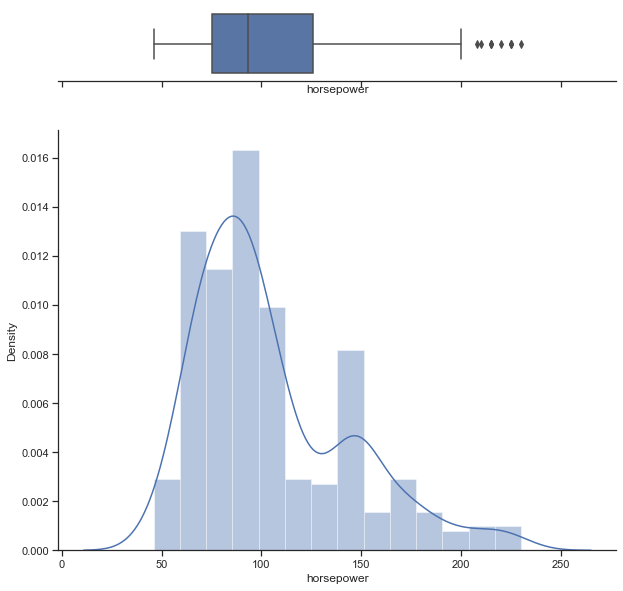

In [7]:
import numpy as np
import seaborn as sns

sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (10,10),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(mpg_df['horsepower'], ax=ax_box)
sns.distplot(mpg_df['horsepower'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [9]:
sorted = mpg_df.sort_values(by = 'horsepower', axis=0, ascending=False, inplace=False)
sorted.head(15)

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
116,16.0,8,230.0,4278,9.5,73,usa,pontiac grand prix
95,12.0,8,225.0,4951,11.0,73,usa,buick electra 225 custom
13,14.0,8,225.0,3086,10.0,70,usa,buick estate wagon (sw)
8,14.0,8,225.0,4425,10.0,70,usa,pontiac catalina
6,14.0,8,220.0,4354,9.0,70,usa,chevrolet impala
94,13.0,8,215.0,4735,11.0,73,usa,chrysler new yorker brougham
7,14.0,8,215.0,4312,8.5,70,usa,plymouth fury iii
25,10.0,8,215.0,4615,14.0,70,usa,ford f250
27,11.0,8,210.0,4382,13.5,70,usa,dodge d200
67,11.0,8,208.0,4633,11.0,72,usa,mercury marquis


So, I don't know much about determing statistical outliers and it seems like this specific observation isn't normally distributed anyways. So I did some stack overflow research to find a package that knows more about statistical outliers and loaded it into here. We've got a histogram with a box plot (as well as an prediction line) plot and then some markers next to the box plot to indicate outliers. There are 6 markers, each indicating a ceratin horsepower variable that lies outside of the fourth quartile. These six points represent quite a few observations in total, since there are several observations with the same high horsepower (displayed above). Let's see what happens to the regression when we take all these "outliers" out (are they actually outliers? I'm not sure how to tell what is and isn't an outlier exactly). 

****I liked these formulas, so I'm reusing them.****

In [49]:
def get_model(formula, df):
    
    # create OLS model
    model = smf.ols(formula, data = df)

    # estimate model
    model = model.fit()
    
    return model

In [50]:
def get_pred(df, model):
    
    # make predictions
    pred = model.predict()
    
    # add predictions to df
    df['pred'] = pred
    
    return df

In [51]:
def plot_pred(df):
    
    fig, ax = plt.subplots()

    # 45 degree line
    ax.plot(df['mpg'], 
            df['mpg'], 
            color = 'black')

    # scatter plot
    ax.scatter(df['mpg'],
               df['pred'])

    # add axis labels
    ax.set_xlabel('mpg')
    ax.set_ylabel('pred')
    
    # add title
    ax.set_title(formula)
    
    plt.show()

In [20]:
formula = 'mpg ~ horsepower'

In [30]:
mpg_df2 = mpg_df[mpg_df.horsepower < 208]

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
116,16.0,8,230.0,4278,9.5,73,usa,pontiac grand prix
95,12.0,8,225.0,4951,11.0,73,usa,buick electra 225 custom
13,14.0,8,225.0,3086,10.0,70,usa,buick estate wagon (sw)
8,14.0,8,225.0,4425,10.0,70,usa,pontiac catalina
6,14.0,8,220.0,4354,9.0,70,usa,chevrolet impala
94,13.0,8,215.0,4735,11.0,73,usa,chrysler new yorker brougham
7,14.0,8,215.0,4312,8.5,70,usa,plymouth fury iii
25,10.0,8,215.0,4615,14.0,70,usa,ford f250
27,11.0,8,210.0,4382,13.5,70,usa,dodge d200
67,11.0,8,208.0,4633,11.0,72,usa,mercury marquis


In [44]:
model = get_model(formula, mpg_df)

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           7.03e-81
Time:                        08:03:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model2 = get_model(formula, mpg_df2)

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     625.7
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           2.55e-82
Time:                        08:03:37   Log-Likelihood:                -1135.9
No. Observations:                 382   AIC:                             2276.
Df Residuals:                     380   BIC:                             2284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.7850      0.762     54.846      0.000      40.287      43.283
horsepower    -0.1780      0.007    -25.013      0.000      -0.192      -0.164
==============================================================================
Omnibus:                       10.651   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.937
Skew:                           0.362   Prob(JB):                      0.00422
Kurtosis:                       3.402   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, removing the outliers (model2) actually increases the R-squared of the model and the statistical significance of the horesepower variable (slightly). The model is much less skewed as well, which should be expected removing any outliers. An interesting assignment!!

# Okay I got so wrapped up in Outliers that i forgot to read the actual assignment. Hopefully you enjoyed that up there, because it is not what we were supposed to do at all! Here's the rest of the assignment:

In [104]:
beta_list = []

def get_beta(df, dep, indep):
    #defining the function
    formula = dep + ' ~ ' + indep
        
    # create OLS model
    model = smf.ols(formula, data = df)

    # estimate model
    model = model.fit()
    
    beta = round(model.params[indep], 3)
    
    beta_list.append(beta)
get_beta(mpg_df, 'mpg', 'horsepower')
print(beta_list)

[-0.158]


In [96]:
mpg_df

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,79.0,2625,18.6,82,usa,ford ranger


In [106]:
for index in mpg_df.index:
    mpg_df.drop(index, axis = 0)
    
    get_beta(mpg_df, 'mpg', 'horsepower')
    
print(beta_list)

[-0.158, -0.158, -0.158, -0.158, -0.158, -0.159, -0.161, -0.163, -0.165, -0.166, -0.166, -0.166, -0.166, -0.169, -0.169, -0.169, -0.169, -0.169, -0.169, -0.17, -0.17, -0.17, -0.17, -0.17, -0.17, -0.172, -0.172, -0.174, -0.174, -0.174, -0.174, -0.174, -0.174, -0.174, -0.174, -0.174, -0.174, -0.174, -0.174, -0.175, -0.175, -0.175, -0.175, -0.175, -0.176, -0.175, -0.176, -0.176, -0.176, -0.176, -0.176, -0.176, -0.176, -0.176, -0.176, -0.176, -0.176, -0.176, -0.176, -0.178, -0.178, -0.178, -0.178, -0.179, -0.179, -0.178, -0.179, -0.18, -0.18, -0.18, -0.181, -0.181, -0.181, -0.181, -0.18, -0.18, -0.18, -0.18, -0.18, -0.181, -0.181, -0.181, -0.181, -0.181, -0.181, -0.181, -0.181, -0.181, -0.18, -0.18, -0.182, -0.182, -0.181, -0.181, -0.185, -0.19, -0.191, -0.191, -0.191, -0.19, -0.191, -0.191, -0.192, -0.192, -0.192, -0.192, -0.193, -0.193, -0.193, -0.194, -0.194, -0.194, -0.195, -0.195, -0.195, -0.194, -0.204, -0.206, -0.206, -0.206, -0.206, -0.206, -0.206, -0.206, -0.207, -0.207, -0.207, -

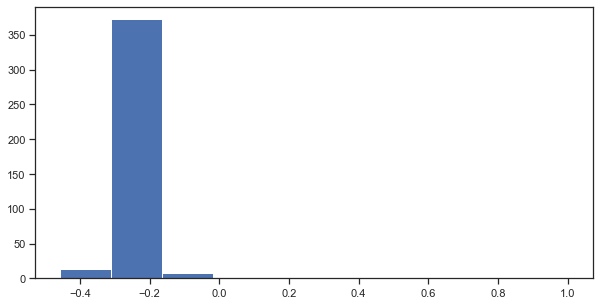

In [113]:
figure, ax = plt.subplots(figsize = (10,5))

ax.hist(beta_list, bins = 10)

plt.show()

It does seem as though outliers have a significant effect on the overall beta (when removing some of the latter variables the beta changes significantly!)